# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 586


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [7]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    coords_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit=1&appid={weather_api_key}"
    city_url = f'{url}lat={coords_lat}&lon={coords_lon}&appid={weather_api_key}'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        coords_list = requests.get(coords_url).json()
        coords=coords_list[0]
        coords_lat= coords['lat']
        coords_lon= coords['lon']
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max'] -273.15
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | rawson
Processing Record 3 of Set 1 | tarakan
Processing Record 4 of Set 1 | cidreira
Processing Record 5 of Set 1 | rikitea
Processing Record 6 of Set 1 | longyearbyen
Processing Record 7 of Set 1 | carnarvon
Processing Record 8 of Set 1 | wajir
Processing Record 9 of Set 1 | hermanus
Processing Record 10 of Set 1 | lompoc
Processing Record 11 of Set 1 | safford
Processing Record 12 of Set 1 | punta arenas
Processing Record 13 of Set 1 | barrow
Processing Record 14 of Set 1 | veraval
Processing Record 15 of Set 1 | kununurra
Processing Record 16 of Set 1 | barentsburg
Processing Record 17 of Set 1 | bambous virieux
Processing Record 18 of Set 1 | ushuaia
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | upernavik
Processing Record 21 of Set 1 | bredasdorp
Processing Record 22 of Set 1 | sobolevo
Processing Record 23 of Set 1 | tuktoy

In [8]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          566
Lat           566
Lng           566
Max Temp      566
Humidity      566
Cloudiness    566
Wind Speed    566
Country       566
Date          566
dtype: int64

In [9]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,busselton,43.1767,51.6797,-0.67,49,14,4.70,KZ,1675053359
1,rawson,-33.6445,115.3489,31.33,36,20,2.77,AU,1675053359
2,tarakan,-43.2991,-65.1057,31.42,20,0,15.02,AR,1675053361
3,cidreira,3.3416,117.5986,26.57,83,75,3.09,ID,1675053361
4,rikitea,-30.1657,-50.2183,21.22,91,2,0.78,BR,1675053362


In [10]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [11]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,43.1767,51.6797,-0.67,49,14,4.70,KZ,1675053359
1,rawson,-33.6445,115.3489,31.33,36,20,2.77,AU,1675053359
2,tarakan,-43.2991,-65.1057,31.42,20,0,15.02,AR,1675053361
3,cidreira,3.3416,117.5986,26.57,83,75,3.09,ID,1675053361
4,rikitea,-30.1657,-50.2183,21.22,91,2,0.78,BR,1675053362


In [36]:
test=city_data_df.loc[0]['Date']

test2=time.gmtime(test)
test2

time.struct_time(tm_year=2023, tm_mon=1, tm_mday=30, tm_hour=4, tm_min=35, tm_sec=59, tm_wday=0, tm_yday=30, tm_isdst=0)

### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

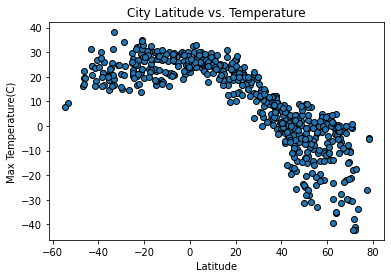

In [41]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df['Lat']
y_values=city_data_df['Max Temp']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Temperature')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature(C)')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

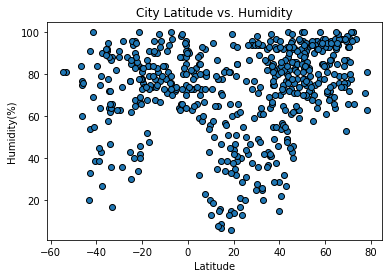

In [42]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df['Lat']
y_values=city_data_df['Humidity']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Humidity')
plt.xlabel('Latitude')
plt.ylabel('Humidity(%)')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

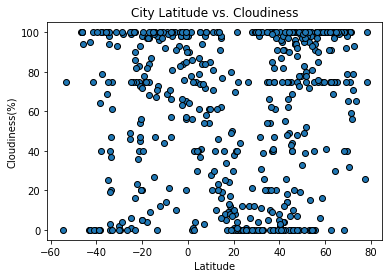

In [43]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df['Lat']
y_values=city_data_df['Cloudiness']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness(%)')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

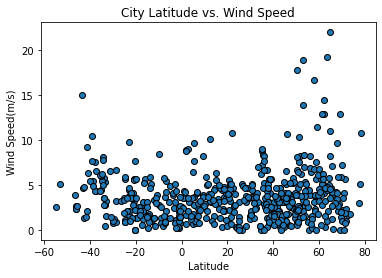

In [44]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df['Lat']
y_values=city_data_df['Wind Speed']
plt.scatter(x_values,y_values,edgecolors='black')
# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(m/s)')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def linear_regression(x,y):
    
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_values = x * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,(x.min(), regress_values.min()),fontsize=15,color="red")
    print(f'The r-value is {rvalue}')
    
    

In [46]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,busselton,43.1767,51.6797,-0.67,49,14,4.70,KZ,1675053359
3,cidreira,3.3416,117.5986,26.57,83,75,3.09,ID,1675053361
6,carnarvon,78.2232,15.6464,-4.85,63,75,10.80,SJ,1675053364
8,hermanus,1.7505,40.0595,23.97,73,0,3.60,KE,1675053365
10,safford,34.6392,-120.4579,9.32,92,75,0.00,US,1675053366


In [47]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,rawson,-33.6445,115.3489,31.33,36,20,2.77,AU,1675053359
2,tarakan,-43.2991,-65.1057,31.42,20,0,15.02,AR,1675053361
4,rikitea,-30.1657,-50.2183,21.22,91,2,0.78,BR,1675053362
5,longyearbyen,-23.1230,-134.9680,26.45,68,16,4.43,PF,1675053363
7,wajir,-24.8826,113.6576,27.10,62,1,5.64,AU,1675053364


###  Temperature vs. Latitude Linear Regression Plot

The r-value is -0.841892875764196


Text(0, 0.5, 'Max Temp(C)')

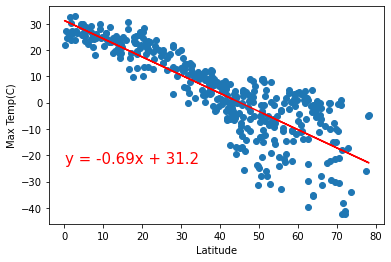

In [80]:
# Linear regression on Northern Hemisphere
y_values=northern_hemi_df['Max Temp']
x_values=northern_hemi_df['Lat']
linear_regression(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')

The r-value is 0.36472606599030183


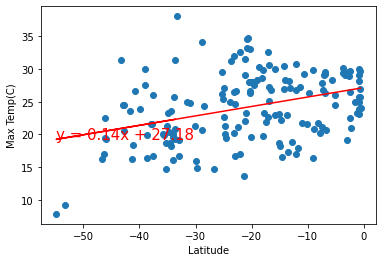

In [81]:
# Linear regression on Southern Hemisphere
y_values=southern_hemi_df['Max Temp']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Max Temp(C)')
linear_regression(x_values,y_values)


**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.41545123680767443


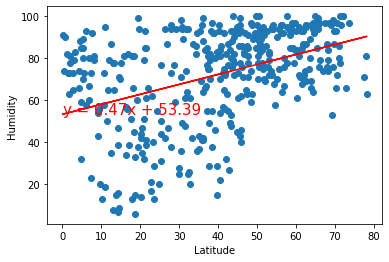

In [82]:
# Northern Hemisphere
y_values=northern_hemi_df['Humidity']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x_values,y_values)

The r-value is 0.28579501893992176


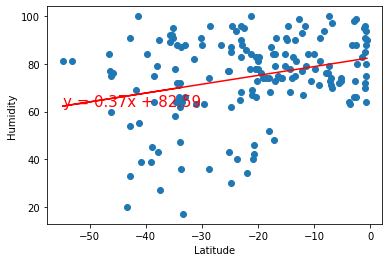

In [91]:
# Southern Hemisphere
y_values=southern_hemi_df['Humidity']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Humidity')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.34356454240507983


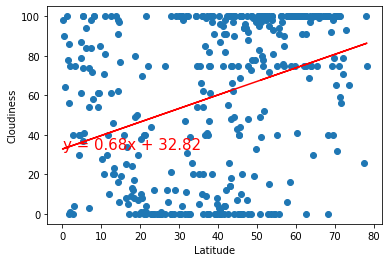

In [87]:
# Northern Hemisphere
y_values=northern_hemi_df['Cloudiness']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x_values,y_values)

The r-value is 0.2503519114659893


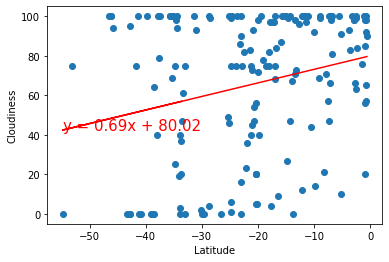

In [88]:
# Southern Hemisphere
y_values=southern_hemi_df['Cloudiness']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.13923517123983423


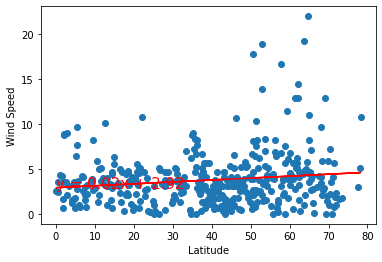

In [89]:
# Northern Hemisphere
y_values=northern_hemi_df['Wind Speed']
x_values=northern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x_values,y_values)

The r-value is -0.39463986660868905


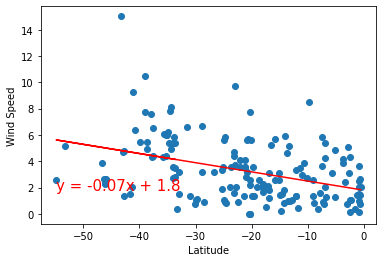

In [90]:
# Southern Hemisphere
y_values=southern_hemi_df['Wind Speed']
x_values=southern_hemi_df['Lat']
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
linear_regression(x_values,y_values)

**Discussion about the linear relationship:** YOUR RESPONSE HERE